In [1]:
import cv2

In [2]:
image = cv2.imread("blue_car_01.jpg")
print("width: %d pixels" % (image.shape[1]))
print("height: %d pixels" % (image.shape[0]))
print("channels: %d " % (image.shape[2]))
cv2.imshow("Image",image)
cv2.waitKey(0)

width: 399 pixels
height: 248 pixels
channels: 3 


113

a call to __cv2.waitKey__ pauses the execution of the script until we press a key on our keyboard. Using a parameter of 0 indicates that any keypress will un-pause the execution.

In [3]:
cv2.imwrite("newimage.jpg", image)

True

In [3]:
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 76, Green: 66, Blue: 54


In [4]:
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


In [5]:
corner = image[0:100, 0:100]
cv2.imshow("Corner", corner)

In [6]:
image[0:100, 0:100] = (0, 0, 255)
cv2.imshow("Updated",image)
cv2.waitKey(0)

32

In [38]:
cv2.destroyAllWindows()

#### Lines and rectangles 

In [17]:
import numpy as np
import cv2

canvas = np.zeros((300, 300, 3), dtype = "uint8")

In [18]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

32

In [19]:
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)     # '3' is the thickness of the line
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

32

In [20]:
cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2.imshow("Canvas",canvas)
cv2.waitKey(0)

32

In [21]:
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

32

In [22]:
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)      # '-1' fills the rectangle
cv2.imshow("Canvas",canvas)
cv2.waitKey(0)

32

#### Circles

In [23]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

32

In [26]:
for i in range(0, 25):
    radius = np.random.randint(0, high = 200)
    color = np.random.randint(0, high = 256, size = (3,)).tolist()
    
    pt = np.random.randint(0, high = 300, size = (2,))
    
    cv2.circle(canvas, tuple(pt), radius, color, -1)
    
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

32

## IMAGE PROCESSING

### 1.IMAGE TRANSFORMATIONS 

#### Translation
- Translation is the shifting of an image along the x and y axis.

In [27]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

#translation matrix
M = np.float32([[1, 0, 25], [0, 1, 50]])

shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Down and Right", shifted)
cv2.waitKey(0)

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
cv2.imshow("Shifted Up and Left", shifted)
cv2.waitKey(0)

32

- However, manually constructing this translation matrix and calling the cv2.warpAffine method takes a fair amount of code – and it’s not pretty code either!
- Let’s create a new file: __imutils.py__. This file will store basic image processing methods, allowing us to conveniently call them without writing a lot of code.


In [28]:
import imutils

shifted = imutils.translate(image, 0, 100)
cv2.imshow("Shifted Down", shifted)
cv2.waitKey(0)

32

Our __translate__ method takes three parameters: 
- the image we are going to translate, 
- the number pixels that we are going to shift along the x-axis, 
- the number of pixels we are going to shift along the y-axis.

#### Rotation 

In [30]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

(h, w) = image.shape[:2]
center = (w / 2, h / 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("Rotated by 45 degrees", rotated)
cv2.waitKey(0)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("Rotated by -90 degrees", rotated)
cv2.waitKey(0)

32

Let's write a convenience method to perform __rotation__ in __imutils.py__

In [5]:
import imutils
import cv2

In [31]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

rotated = imutils.rotation(image, 180)
cv2.imshow("Rotated by 180 Degrees", rotated)
cv2.waitKey(0)

32

#### Resizing

- When resizing an image, we need to keep in mind the aspect ratio of the image. 
- The aspect ratio is the proportional relationship of the width and the height of the image

In [33]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

# resizing by width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("Resized (Width)", resized)
cv2.waitKey(0)

32

Last parameter is our __interpolation__ method, which is the algorithm working behind the scenes to handle how the actual image is resized.

In [34]:
# resizing by height
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2.imshow("Resized (height)", resized)
cv2.waitKey(0)

32

Let's write a convenience method to perform __resize__ in __imutils.py__.

In [1]:
import imutils
import cv2

In [3]:
image = cv2.imread("blue_car_01.jpg")
# resize by width
resized = imutils.resize(image, width = 100)
cv2.imshow("Resized via Function", resized)
cv2.waitKey(0)

18

In [5]:
# resize by height
resized = imutils.resize(image, height = 50)
cv2.imshow("Resized via Function", resized)
cv2.waitKey(0)

32

#### Flipping 

In [36]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

flipped = cv2.flip(image, 1)
cv2.imshow("Flipped Horizontally", flipped)
cv2.waitKey(0)

flipped = cv2.flip(image, 0)
cv2.imshow("Flipped Vertically", flipped)
cv2.waitKey(0)

flipped = cv2.flip(image, -1)
cv2.imshow("Flipped Horizontally and Vertically", flipped)
cv2.waitKey(0)

32

The __cv2.flip__ method requires two arguments: the image we want to flip and a __flip code__ that is used to determine how we are going to flip the image.

#### Cropping
- When we crop an image, we want to remove the outer parts of the image that we are not interested in.

In [37]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

cropped = image[30:120, 240:335]
cv2.imshow("Cropped", cropped)
cv2.waitKey(0)

32

- OpenCV represents images as NumPy arrays with the height first and the width second.
- This means that we need to supply our y-axis values before our x-axis.

### 2.IMAGE ARITHMETIC
- keep in mind that there is a difference between OpenCV and NumPy addition.
- NumPy will perform modulus arithmetic and “wrap around”. 
- OpenCV on the other hand will perform clipping and ensure pixel values never fall outside the range [0, 255].

In [10]:
import numpy as np
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

print("max of 255: " + str(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: " + str(cv2.subtract(np.uint8([50]), np.uint8([100]))))
print("wrap around: " + str(np.uint8([200]) + np.uint8([100])))
print("wrap around: " + str(np.uint8([50]) - np.uint8([100])))

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


let’s perform the arithmetic on actual images and view the results:

In [39]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
cv2.imshow("Added", added)
cv2.waitKey(0)

M = np.ones(image.shape, "uint8") * 50
subtracted = cv2.subtract(image, M)
cv2.imshow("Subtracted", subtracted)
cv2.waitKey(0)

32

### BITWISE OPERATIONS

- Bitwise operations operate in a binary manner and are represented as grayscale images. 
- A given pixel is turned “off” if it has a value of zero and it is turned “on” if the pixel has a value greater than zero.

In [40]:
import numpy as np
import cv2

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)
cv2.waitKey(0)

circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)
cv2.waitKey(0)

32

We will make use of these shapes to demonstrate our bitwise operations:

In [41]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

bitwiseNot = cv2.bitwise_not(circle)
cv2.imshow("NOT", bitwiseNot)
cv2.waitKey(0)

32

In [47]:
cv2.destroyAllWindows()

### MASKING

- Using a mask allows us to focus only on the portions of the image that interests us.

In [44]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

mask = np.zeros(image.shape[:2], dtype="uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)

masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Maks Applied to Image", masked)
cv2.waitKey(0)

32

- By supplying a mask, the cv2.bitwise_and function only examines pixels that are “on” in the mask. 
- In this case, only pixels that are part of the white rectangle.

In [46]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Mask", mask)
cv2.imshow("Mask Applied to Image", masked)
cv2.waitKey(0)

32

### SPLITTING AND MERGING CHANNELS 

In [1]:
import numpy as np
import cv2

In [48]:
image = cv2.imread("blue_car_01.jpg")
(B, G, R) = cv2.split(image)

cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

merged = cv2.merge([B, G, R])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Splitting the channels is done using a call to cv2.split
- OpenCV stores RGB images as NumPy arrays in reverse channel order.

In [49]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

### COLOR SPACES
- The Hue-Saturation-Value (HSV) color space is more similar to how humans think and conceive of color. 
- Then there is the L*a*b* color space which is more tuned to how humans perceive color.

Let’s explore some code to change color spaces.

In [50]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b", lab)
cv2.waitKey(0)
cv2.destroyAllWindows()

## HISTOGRAMS
- A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image. 
- By simply examining the histogram of an image, you get a general understanding regarding the contrast, brightness, and intensity distribution. 

#### 1.USING OPENCV TO COMPUTE HISTOGRAMS

- cv2.calcHist(images,channels,mask,histSize,ranges)

#### 2.GRAYSCALE HISTOGRAMS

In [52]:
import matplotlib.pyplot as plt
import cv2

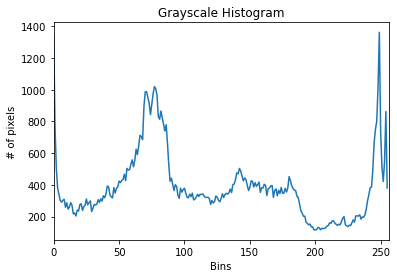

In [54]:
image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original", image)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)
cv2.destroyWindow("Original")

How do we interpret this histogram? We can observe that there are many pixels between 50-100 and also around 250.
This means that the image contains both the dark pixels as well as the white pixels.

#### 3.COLOR HISTOGRAMS

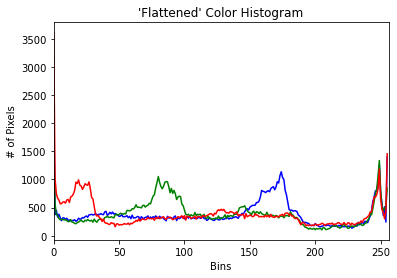

32

In [55]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

- We see there is a sharp peak in the red histogram around bin 25. This indicates a darker red value.
- A sharp peak in the green histogram around bin 80. This indicates a darker green value.
- A sharp peal in the blue histogram around bin 170.This indicates a slightly lighter blue values.
- At around bin 250 all three colors r,g,b are peaked again indicating darker values for all.

Let’s checkout some code to automate the process of building a 2D histogram:

2D histogram shape: (32, 32), with 1024 values


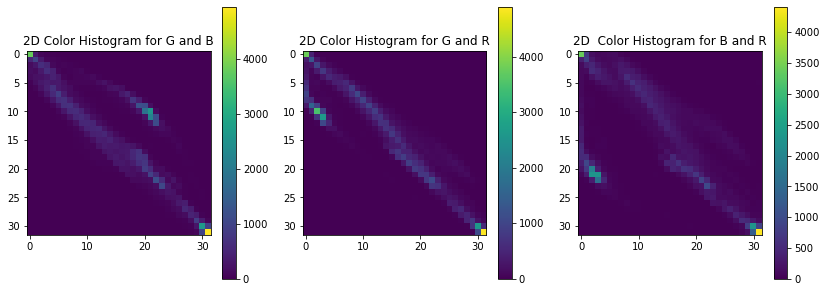

In [36]:
fig = plt.figure(figsize=(14, 5))

ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D  Color Histogram for B and R")
plt.colorbar(p)

print("2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

- Here we see that we are passing in a list of two channels: the Green and Blue channels.
- So how is a 2D histogram stored in OpenCV? It’s a 2D NumPy array. Since I used 32 bins for each channel, I now have a 32 × 32 histogram.
- Most applications use somewhere between 8 and 64 bins when computing multi-dimensional histograms.

Using a 2D histogram takes into account two channels at a time. But what if we wanted to account for all three RGB channels?

In [39]:
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape : %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

3D histogram shape : (8, 8, 8), with 512 values


- We are now computing an 8 × 8 × 8 histogram for each of the RGB channels. 
- We can’t visualize this histogram, but we can see that the shape is indeed (8,8,8) with 512 values.

#### 4.HISTOGRAM EQUALIZATION
- Histogram equalization improves the contrast of an image by __“stretching”__ the distribution of pixels.
- Histogram equalization is applied to __grayscale__ images.
- is normally useful when enhancing the contrast of medical or satellite images.

In [57]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(image)

cv2.imshow("Histogram Equalization", np.hstack([image, eq]))
cv2.waitKey(0)
cv2.destroyAllWindows()

Notice how the contrast of the image has been radically changed and now spans the entire range of [0, 255].

#### 5.HISTOGRAMS AND MASKS
- masks can be used to focus on only regions of an image that interest us.
- We are now going to construct a mask and compute color histograms for only the masked region.

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of pixels")
    
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])o
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

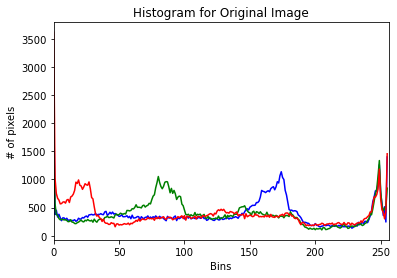

In [60]:
image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
plot_histogram(image, "Histogram for Original Image")
cv2.waitKey(0)

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (25, 128), (75, 180), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)

masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()

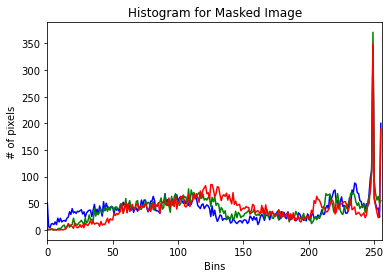

In [47]:
plot_histogram(image, "Histogram for Masked Image", mask)
plt.show()

## SMOOTHING AND BLURRING

- In fact, many image processing and computer vision functions, such as thresholding and edge detection, perform better if the image is first smoothed or blurred.

In [58]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
cv2.imshow("Original", image)
cv2.waitKey(0)

32

#### 1.AVERAGING

- The first blurring method we are going to explore is averaging.
- As the name suggests, we are going to define a k × k sliding window on top of our image, where k is always an odd number.
- The pixel at the center of this matrix  is then set to be the average of all other pixels surrounding it.
- We call this sliding window a “convolution kernel” or just a “kernel”.
- As we will see, as the size of the kernel increases, the more blurred our image will become.

In [60]:
blurred = np.hstack([cv2.blur(image, (3, 3)),
                    cv2.blur(image, (5, 5)),
                    cv2.blur(image, (7, 7))])
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In order to average blur an image, we use the __cv2.blur__ function. This function requires two arguments: the image we want to blur and the size of the kernel.

#### 2.GAUSSIAN
- Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.
- The end result is that our image is less blurred, but more naturally blurred, than using the average method.

In [61]:
blurred = np.hstack([cv2.GaussianBlur(image, (3, 3), 0),
                    cv2.GaussianBlur(image, (5, 5), 0),
                    cv2.GaussianBlur(image, (7, 7), 0)])
cv2.imshow("Gaussian", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

- The last parameter is our σ, the standard deviation in the
x-axis direction. By setting this value to 0, we are instructing OpenCV to automatically compute them based on our
kernel size.
- the blur itself is
more natural, due to the computation of the weighted mean,
rather than allowing all pixels in the kernel neighborhood
to have equal weight.

#### 3.MEDIAN

- replacing the central pixel with the median of the neighborhood. 
- Methods such as averaging and Gaussian compute means or weighted means for the neighborhood – this average pixel intensity may or may not be present in the neighborhood. But by definition, the median pixel must exist in our neighborhood. By replacing our central pixel with a median rather than an average, we can substantially reduce noise.


In [64]:
blurred = np.hstack([cv2.medianBlur(image, 3),
                    cv2.medianBlur(image, 5),
                    cv2.medianBlur(image, 7)])
cv2.imshow("Median", blurred)
cv2.waitKey(0)
cv2.destroyWindow("Median")

- Notice that we are no longer creating a “motion blur” effect like in averaging and Gaussian blurring – instead, we are removing detail and noise.

#### 4.BILATERAL
- Thus far, the intention of our blurring methods have been to reduce noise and detail in an image; however, we tend to lose edges in the image.
- In order to reduce noise while still maintaining edges, we can use bilateral blurring.

In [65]:
blurred = np.hstack([cv2.bilateralFilter(image, 5, 21, 21),
                    cv2.bilateralFilter(image, 7, 31, 31),
                    cv2.bilateralFilter(image, 9, 41, 41)])
cv2.imshow("Bilateral", blurred)
cv2.waitKey(0)
cv2.destroyWindow("Bilateral")

- our image has noised removed, yet still retains edges and does not appear to be “motion blurred”.

## THRESHOLDING

- Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255.
- Normally, we use thresholding to focus on objects or areas of particular interest in an image.

#### 1.SIMPLE THRESHOLDING 

In [2]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0) 
# Applying Gaussian blurring helps remove some of the high frequency edges in the image that we are not concerned with.
cv2.imshow("Image", image)
cv2.waitKey(0)

(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)
cv2.waitKey(0)

(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", threshInv)
cv2.waitKey(0)

cv2.imshow("Van", cv2.bitwise_and(image, image, mask = threshInv))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2.ADAPTIVE THRESHOLDING
- We can use adaptive thresholding, which considers small neighbors of pixels and then finds an optimal threshold value T for each neighbor. 
- This method allows us to handle cases where there may be dramatic ranges of pixel intensities and the optimal value of T may change for different parts of the image.

In [3]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)
cv2.waitKey(0)

# Mean Adaptive Thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
cv2.imshow("Mean Thresh", thresh)
cv2.waitKey(0)

# Gaussian Adaptive Thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
cv2.imshow("Gaussian Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 3.OTSU AND RIDDLER-CALVARD

- Another way we can automatically compute the threshold value of T is to use Otsu’s method.
- Otsu’s method assumes there are two peaks in the grayscale histogram of the image. In then tries to find an optimal value to separate these two peaks – thus our value of T.

In [4]:
import numpy as np
import cv2
import mahotas  # another image processing package

In [5]:
image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Image", image)
cv2.waitKey(0)

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: %d" % T)

Otsu's threshold: 127


In [6]:
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0

thresh = cv2.bitwise_not(thresh)  #equivalent to applying a cv2.THRESH_BINARY_INV thresholding type
cv2.imshow("Otsu", thresh)
cv2.waitKey(0)

T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: %d" % T)

thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddler-Calvard", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

Riddler-Calvard: 127


## GRADIENT AND EDGE DETECTION

-  edge detection embodies mathematical methods to find points in an image where the brightness of pixel intensities changes distinctly.

#### 1.LAPLACIAN AND SOBEL 

In [11]:
import numpy as np
import cv2

image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original", image)
cv2.waitKey(0)

lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow("Laplacian", lap)
cv2.waitKey(0)
cv2.destroyAllWindows()

- When computing gradients and edges we (normally) compute them on a single channel – in this case, we are using the grayscale image.
- we use the Laplacian method to compute the gradient magnitude image by calling the cv2.Laplacian function.
- Why are we using a 64-bit float now? 
    - The reason involves the transition of black-to-white and white-to-black in the image.
    - Transitioning from black-to-white is considered a positive slope, whereas a transition from white-to-black is a negative slope.
    - The short answer here is that if you don’t use a floating point data type when computing the gradient magnitude image, you will miss edges, specifically the white-to-black transitions.
    - In order to ensure you catch all edges, use a floating point data type, then take the absolute value of the gradient image and convert it back to an 8-bit unsigned integer.

Let’s move on to computing the __Sobel gradient__ representation:

In [15]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

cv2.imshow("Sobel X", sobelX)
cv2.imshow("Sobel Y", sobelY)
cv2.imshow("Sobel Combined", sobelCombined)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Using the Sobel operator, we can compute gradient magnitude representations along the x and y axis, allowing us to find both horizontal and vertical edge-like regions.
- Computing the Sobel gradient magnitude along the x-axis is finding vertical edges.
- Computing the Sobel gradient magnitude along the y-axis is finding horizontal edges.

- One thing you’ll notice is that the edges are very “noisy”. They are not clean and crisp.
- We’ll remedy that by using the Canny edge detector in the next section.

#### 2.CANNY EDGE DETECTOR
- The Canny edge detector is a multi-step process. 
- It involves :- 
    - blurring the image to remove noise, 
    - computing Sobel gradient images in the x and y direction, 
    - suppression of edges, and 
    - finally a hysteresis thresholding stage that determines if a pixel is “edge-like” or not.

In [16]:
image = cv2.imread("blue_car_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Blurred", image)
cv2.waitKey(0)

canny = cv2.Canny(image, 30, 150)
cv2.imshow("Canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Any gradient value larger than threshold2 are considered to be an edge.Any value below threshold1 are considered not to be an edge. 
- Values in between threshold1 and threshold2 are either classified as edges or non-edges based on how their intensities are “connected”. 
- In this case, any gradient values below 30 are considered non-edges whereas any value above 150 are considered edges.

- Notice how the edges are more “crisp”. We have substantially less noise than we used the Laplacian or Sobel
gradient images. Furthermore, the outline of our vehicle is clearly revealed.

## CONTOURS
- OpenCV provides methods to find “curves” in an image, called contours.
- A contour is a curve of points, with no gaps in the curve. 
- Contours are extremely useful for such things as shape approximation and analysis.
- In order to find contours in an image, you need to first obtain a binarization of the image, using either edge detection methods or thresholding.

#### 1.COUNTING COINS 

In [17]:
import numpy as np
import cv2

image = cv2.imread("coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (19, 19), 0)
cv2.imshow("Image", image)
cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
cv2.imshow("Edges", edged)
cv2.waitKey(0)

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count %d coins in this image" % (len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
cv2.imshow("Coins", coins)
cv2.waitKey(0)
cv2.destroyAllWindows()

I count 18 coins in this image


- The second argument is the type of contours we want.We use __cv2.RETR_EXTERNAL__ to retrieve only the outermost contours (i.e. the contours that follow the outline of the coin). We could also pass in __cv2.RETR_LIST__ to grab all contours. Other methods include hierarchical contours using cv2.RETR_COMP and cv2.RETR_TREE.
- Our last argument is how we want to approximate the contour. We use __cv2.CHAIN_APPROX_SIMPLE__ to compress horizontal, vertical, and diagonal segments into only their endpoints.
- Our contours __cnts__ is simply a Python list. We can use the len function on it to count the number of contours that were returned.
- A call to __cv2.drawContours__ draws the actual contours on our image.
- By specifying a negative value of −1, we are indicating that we want to draw all of the contours.

Let’s __crop__ each individual coin from the image:

In [19]:
for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    
    print("Coin #%d" % (i + 1))
    coin = image[y:y + h, x:x + w]
    cv2.imshow("Coin"+str(i+1), coin)
    cv2.waitKey(0)
    
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x+w]
    cv2.imshow("Masked Coin"+str(i+1), cv2.bitwise_and(coin, coin, mask = mask))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Coin #1
Coin #2
Coin #3
Coin #4
Coin #5
Coin #6
Coin #7
Coin #8
Coin #9
Coin #10
Coin #11
Coin #12
Coin #13
Coin #14
Coin #15
Coin #16
Coin #17
Coin #18


- We then use the __cv2.boundingRect__ function on the current contour. This method finds the “enclosing box” that our contour will fit into, allowing us to crop it from the image. The function takes a single parameter, a contour, and then returns a tuple of the x and y position that the rectangle starts at, followed by the width and height of the rectangle.
-  A call to __cv2.minEnclosingCircle__ fits a circle to our contour. We pass in a circle variable, the current contour, and are given the x and y coordinates of the circle, along with its radius.

- __Contours__ are extremely powerful tools to have in our toolbox. They allow us to count objects in images and allow us to extract these objects from images.